[0.64978903 0.37974684 0.79746835 0.69198312 0.87763713 0.82278481
 0.89873418]
Accuracy score = 0.731163351416516
time for training and predicting the test sets = 2.29580726399999 s
Test score = 0.891566265060241
time for the learning curve = 53.597533811999995 s


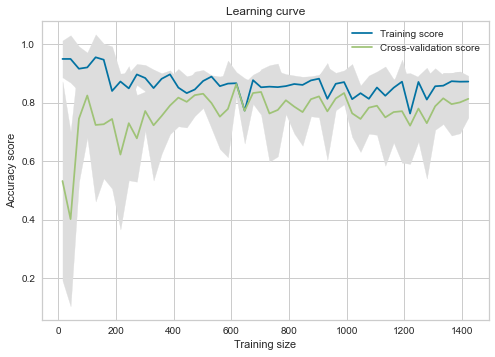

In [5]:
# Dataset 2 : Movie
# Output : Awards : Yes or No
# MLPClassifier() --> hidden_layer_sizes=(100,), activation='relu', solver='adam',max_iter= 1000

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# model 
from sklearn.neural_network import MLPClassifier
# cross validation
from sklearn.model_selection import cross_val_score
# validation curve
from yellowbrick.model_selection import validation_curve
# learning curve
from sklearn.model_selection import learning_curve
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie_EM.csv', encoding='latin-1')
df = pd.read_csv(a)
#df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

time1 = time.perf_counter()

model = MLPClassifier(hidden_layer_sizes=(100,),
                      activation='relu',
                      solver='adam',
                      max_iter= 1000)

model.fit(X_train,y_train)

validation = cross_val_score(model, X, y, cv=7)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('Test score =', score)

#Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(100,),activation='relu',solver='adam',max_iter= 1000) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

#time after doing the learning curve
time3 = time.perf_counter()
timeB = time3 - time2
print('time for the learning curve =',timeB,'s')

train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')


plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [6]:
df.shape

(1659, 10)

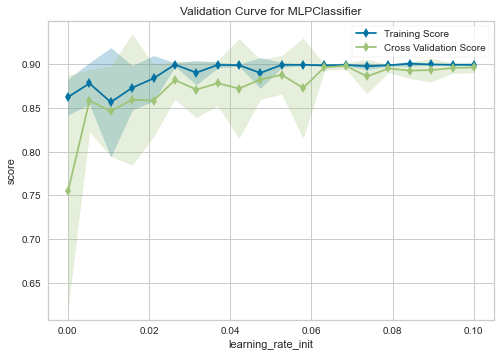

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='learning_rate_init', ylabel='score'>,
                cv=7, estimator=MLPClassifier(alpha=0.026, max_iter=1000),
                param_name='learning_rate_init',
                param_range=array([0.0001    , 0.00535789, 0.01061579, 0.01587368, 0.02113158,
       0.02638947, 0.03164737, 0.03690526, 0.04216316, 0.04742105,
       0.05267895, 0.05793684, 0.06319474, 0.06845263, 0.07371053,
       0.07896842, 0.08422632, 0.08948421, 0.09474211, 0.1       ]))


/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


time for doing the validation and learning curve = 89.58437567200008 s


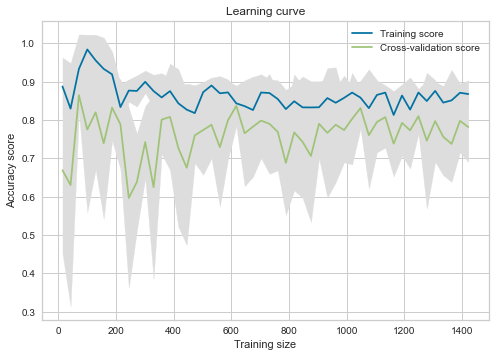

In [9]:
# Hyperparameters : hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000 , alpha=0.026
# Vary : learning_rate_init

time1 = time.perf_counter()

#validation curve
print(validation_curve(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000, alpha=0.026) , 
                       X , y , 
                       param_name ='learning_rate_init', 
                       param_range=np.linspace(0.0001,0.1,20), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',max_iter= 1000, alpha=0.026) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for doing the validation and learning curve =',timeA,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

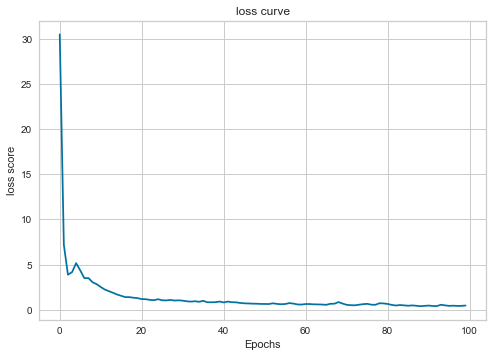

In [10]:
import matplotlib.pyplot as plt
plt.plot(model.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('loss score')
plt.title('loss curve')
plt.show()